In [9]:
import tensorflow
from tensorflow import keras
import keras.layers as layer
import keras.optimizers as opt
import keras.losses as loss
import keras.metrics as metrics
from keras.models import Model
import os
from sklearn.model_selection import train_test_split
import cv2
import numpy as np

In [8]:
pathBreast = "../data/Multi Cancer/Breast Cancer/"

print(os.listdir(pathBreast + "breast_benign"))

['breast_benign_0001.jpg', 'breast_benign_0002.jpg', 'breast_benign_0003.jpg', 'breast_benign_0004.jpg', 'breast_benign_0005.jpg', 'breast_benign_0006.jpg', 'breast_benign_0007.jpg', 'breast_benign_0008.jpg', 'breast_benign_0009.jpg', 'breast_benign_0010.jpg', 'breast_benign_0011.jpg', 'breast_benign_0012.jpg', 'breast_benign_0013.jpg', 'breast_benign_0014.jpg', 'breast_benign_0015.jpg', 'breast_benign_0016.jpg', 'breast_benign_0017.jpg', 'breast_benign_0018.jpg', 'breast_benign_0019.jpg', 'breast_benign_0020.jpg', 'breast_benign_0021.jpg', 'breast_benign_0022.jpg', 'breast_benign_0023.jpg', 'breast_benign_0024.jpg', 'breast_benign_0025.jpg', 'breast_benign_0026.jpg', 'breast_benign_0027.jpg', 'breast_benign_0028.jpg', 'breast_benign_0029.jpg', 'breast_benign_0030.jpg', 'breast_benign_0031.jpg', 'breast_benign_0032.jpg', 'breast_benign_0033.jpg', 'breast_benign_0034.jpg', 'breast_benign_0035.jpg', 'breast_benign_0036.jpg', 'breast_benign_0037.jpg', 'breast_benign_0038.jpg', 'breast_ben

In [10]:
pathBreast = "../data/Multi Cancer/Breast Cancer/"

images, labels = [], []
for category in os.listdir(pathBreast):
    for filename in os.listdir(pathBreast + category):
        img = cv2.imread(os.path.join(pathBreast + category, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        if img is not None:
            images.append(img)
            labels.append(1 if category.split('_')[1] == "benign" else 0)

images = np.array(images)
labels = np.array(labels)
x_train, x_test_val_data, y_train, y_test_val_data = train_test_split(images, labels, test_size = 0.4, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test_val_data, y_test_val_data, test_size = 0.5, random_state=69, shuffle=True)
# train_data, test_data, val_data = map(
#     keras.backend.constant, (x_train, x_test, x_val, y_train, y_test, y_val)
# )

In [11]:
print(x_test.shape)
print(y_test[0])
print(y_test[-1])

(2000, 256, 256, 3)
0
1


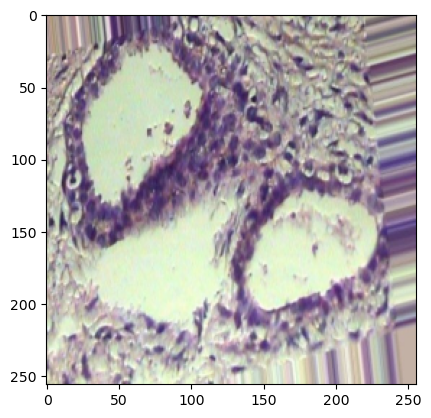

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_test[-1])

In [13]:
print(np.unique(y_train))

[0 1]


In [14]:
# Preprocessing:
# normalize input
x_train = x_train - np.mean(x_train, axis = 0)
x_train /= np.std(x_train, axis=0)

x_test = x_test - np.mean(x_test, axis=0)
x_test /= np.std(x_test, axis=0)

x_val = x_val - np.mean(x_val, axis=0)
x_val /= np.std(x_val, axis=0)

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_val = keras.utils.to_categorical(y_val, 2)

In [15]:
inputs = layer.Input(shape=(256, 256, 3))

flatten = layer.Flatten()(inputs)
x = layer.Dense(1028, activation='relu')(flatten)
out = layer.Dense(2, activation='softmax')(x)

base_model = Model(inputs, out)

base_model.compile(optimizer=opt.SGD(learning_rate=0.01, momentum=0.9), loss=loss.categorical_crossentropy, metrics=[metrics.Accuracy()])
base_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 1028)              202114052 
                                                                 
 dense_1 (Dense)             (None, 2)                 2058      
                                                                 
Total params: 202116110 (771.01 MB)
Trainable params: 202116110 (771.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
callbakcs = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=True
)

base_model_hist = base_model.fit(x_train, y_train, batch_size=128, epochs=100, callbacks=[callbakcs], verbose=1, validation_data=(x_val, y_val), shuffle=True)

Epoch 1/100
47/47 [==============================] - 110s 2s/step - loss: 559619.0000 - accuracy: 0.6118 - val_loss: 4072565.0000 - val_accuracy: 0.7930
Epoch 2/100
47/47 [==============================] - 85s 2s/step - loss: 4421289984.0000 - accuracy: 0.6767 - val_loss: 109911293952.0000 - val_accuracy: 0.3995
Epoch 3/100
47/47 [==============================] - 83s 2s/step - loss: 58876099559424.0000 - accuracy: 0.6732 - val_loss: 366431443091456.0000 - val_accuracy: 0.7695
Epoch 4/100
47/47 [==============================] - 82s 2s/step - loss: 168847877508956160.0000 - accuracy: 0.7055 - val_loss: 2253956368304177152.0000 - val_accuracy: 0.2850
Epoch 5/100
47/47 [==============================] - 85s 2s/step - loss: 697871957651565314048.0000 - accuracy: 0.6798 - val_loss: 3204022341548002770944.0000 - val_accuracy: 0.7695
Epoch 6/100
47/47 [==============================] - 99s 2s/step - loss: 17105548181557397315125248.0000 - accuracy: 0.6935 - val_loss: 311481528602558764060508

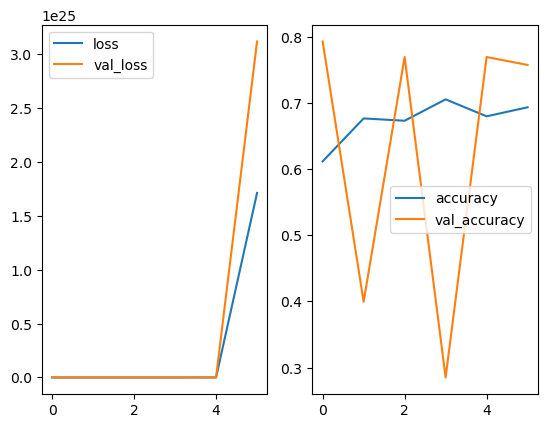

In [17]:
plt.subplot(1, 2, 1)
plt.plot(base_model_hist.epoch, base_model_hist.history['loss'])
plt.plot(base_model_hist.epoch, base_model_hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.subplot(1, 2, 2)
plt.plot(base_model_hist.epoch, base_model_hist.history['accuracy'])
plt.plot(base_model_hist.epoch, base_model_hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

# Conclusion of the base model
Looking at the base model, a single hidden layer FCN, is far too simple for such complex images as cell scans of tumors. Now lets try build a CNN, with a few convolutional blocks

In [29]:
inputs = layer.Input(shape=(256, 256, 3))

# encoder
a = layer.Conv2D(filters=8, kernel_size=(7, 7), activation='relu')(inputs)
a = layer.MaxPool2D(pool_size=(2, 2))(a)

b = layer.Conv2D(filters=16, kernel_size=(7, 7), activation='relu')(a)
b = layer.MaxPool2D(pool_size=(2, 2))(b)

c = layer.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(b)
c = layer.MaxPool2D(pool_size=(2, 2)) (c)
encoded = layer.Flatten()(c)

# decoder
x = layer.Dense(512, activation='relu')(encoded)
prediction = layer.Dense(2, activation='relu')(x)

base_cnn = Model(inputs, prediction)

base_cnn.compile(optimizer=opt.Adadelta(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
base_cnn.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 250, 250, 8)       1184      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 125, 125, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 119, 119, 16)      6288      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 59, 59, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 57, 57, 32)        4640

In [30]:
base_cnn_hist = base_cnn.fit(x_train, y_train, batch_size=128, epochs=100, callbacks=[callbakcs], verbose=1, validation_data=(x_val, y_val), shuffle=True)

Epoch 1/100
47/47 [==============================] - 379s 8s/step - loss: 0.7584 - accuracy: 0.7235 - val_loss: 0.5409 - val_accuracy: 0.7500
Epoch 2/100
47/47 [==============================] - 364s 8s/step - loss: 0.5204 - accuracy: 0.7682 - val_loss: 0.5104 - val_accuracy: 0.7760
Epoch 3/100
47/47 [==============================] - 382s 8s/step - loss: 0.5289 - accuracy: 0.7767 - val_loss: 0.5005 - val_accuracy: 0.7815
Epoch 4/100
47/47 [==============================] - 365s 8s/step - loss: 0.4555 - accuracy: 0.7862 - val_loss: 0.4926 - val_accuracy: 0.7885
Epoch 5/100
47/47 [==============================] - 334s 7s/step - loss: 0.4684 - accuracy: 0.7982 - val_loss: 0.5936 - val_accuracy: 0.7940
Epoch 6/100
47/47 [==============================] - 312s 7s/step - loss: 0.4543 - accuracy: 0.7982 - val_loss: 0.6474 - val_accuracy: 0.7920
Epoch 7/100
47/47 [==============================] - 307s 7s/step - loss: 0.4370 - accuracy: 0.8002 - val_loss: 0.5906 - val_accuracy: 0.7990
Epoch 

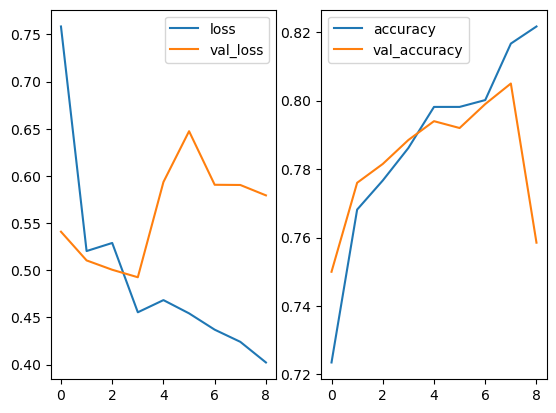

In [31]:
plt.subplot(1, 2, 1)
plt.plot(base_cnn_hist.epoch, base_cnn_hist.history['loss'])
plt.plot(base_cnn_hist.epoch, base_cnn_hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.subplot(1, 2, 2)
plt.plot(base_cnn_hist.epoch, base_cnn_hist.history['accuracy'])
plt.plot(base_cnn_hist.epoch, base_cnn_hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])